In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline


In [2]:
from matplotlib import pyplot as plt
from matplotlib import rcParams
import numpy as np
from pathlib import Path
import pandas as pd
import seaborn as sns
import warnings

In [3]:
rcParams['figure.figsize'] = (16, 8)
plt.style.use('fivethirtyeight')
pd.set_option('max_columns', 100)
pd.set_option("display.precision", 4)
warnings.simplefilter('ignore')

In [5]:
%ls  ..\input\

 C 드라이브의 볼륨: Windows10
 볼륨 일련 번호: A0DF-039E

 C:\Users\user\input 디렉터리

2020-09-25  오후 03:58    <DIR>          .
2020-09-25  오후 03:58    <DIR>          ..
2020-09-25  오후 03:56    <DIR>          .ipynb_checkpoints
2020-09-23  오후 10:12           800,010 dt_j1.csv
2020-09-08  오후 04:25        18,936,246 test.csv
2020-09-08  오후 04:25        76,278,443 train.csv
               3개 파일          96,014,699 바이트
               3개 디렉터리  19,934,310,400 바이트 남음


In [4]:
data_dir = Path('../input') #set path
feature_dir = Path('../feature')
trn_file = data_dir /  'train.csv' #train file
tst_file = data_dir / 'test.csv' #test file
feature_file = feature_dir / 'feature.csv' 
seed = 42

In [5]:
trn = pd.read_csv(trn_file, index_col=0) 
print(trn.shape) 
trn.head() 

(320000, 19)


,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class
id,,,,,,,,,,,,,,,,,,,
0,23.2640,20.3368,19.0095,17.6724,16.9396,-8.1086e-05,23.1243,20.2578,18.9551,17.6321,16.9089,18,18,1.1898,1.1907,1.1890,1.1894,1.1902,0
1,15.0521,14.0620,13.4524,13.2684,13.1689,4.5061e-03,14.9664,14.0045,13.4114,13.2363,13.1347,1,1,1.2533,1.2578,1.2488,1.2510,1.2555,1
2,16.7864,15.8254,15.5363,15.3935,15.3500,4.7198e-04,16.6076,15.6866,15.4400,15.3217,15.2961,2,2,1.0225,1.0241,1.0210,1.0217,1.0233,0
3,25.6606,21.1887,20.2212,19.8949,19.6346,5.8143e-06,25.3536,20.9947,20.0873,19.7947,19.5552,4,3,1.2054,1.2061,1.2049,1.2051,1.2057,0
4,24.4534,20.6992,19.0424,18.3242,17.9826,-3.3247e-05,23.7714,20.4338,18.8630,18.1903,17.8759,13,12,1.1939,1.1943,1.1937,1.1938,1.1941,0


In [6]:
trn.tail() 

,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class
id,,,,,,,,,,,,,,,,,,,
319995,18.3656,17.2409,16.7739,16.4850,16.3404,5.1988e-02,18.1328,17.0406,16.6374,16.3861,16.2874,2,2,1.0930,1.0888,1.0973,1.0951,1.0909,2
319996,18.6856,17.6658,17.1904,16.8169,16.6367,8.7261e-02,18.5207,17.5131,17.0871,16.7436,16.6017,2,2,1.0517,1.0508,1.0526,1.0522,1.0513,1
319997,21.1890,18.4234,17.2956,16.9011,16.6841,-1.0148e-05,20.9890,18.3076,17.2152,16.8403,16.6355,31,30,1.1933,1.1941,1.1925,1.1929,1.1937,0
319998,18.8472,17.3186,16.5057,16.1806,15.9116,-4.5209e-05,16.3900,15.4058,15.1823,15.1969,15.1793,1,1,1.1725,1.1726,1.1725,1.1725,1.1725,0
319999,19.8604,18.8199,18.5156,18.4149,18.3080,-9.6544e-04,19.8256,18.7819,18.4908,18.3987,18.3098,1,1,1.0571,1.0562,1.0580,1.0575,1.0567,0


In [9]:
trn.describe() # 전체적인 값의 분포

,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class
count,320000.0000,320000.0000,320000.0000,320000.0000,320000.0000,3.2000e+05,320000.0000,320000.0000,320000.0000,320000.0000,320000.0000,320000.0000,320000.0000,320000.0000,320000.0000,320000.0000,320000.0000,320000.0000,320000.0000
mean,19.8524,18.3768,17.7358,17.1742,16.8752,5.8308e-02,19.6289,18.2271,17.6154,17.1523,16.8693,6.3327,6.1388,1.1758,1.1765,1.1751,1.1754,1.1761,1.1163
std,1.9455,31.1108,1.4662,52.5615,57.1463,5.7546e-01,1.9236,17.7866,1.4730,25.0758,35.4365,8.8811,8.5516,0.1163,0.1181,0.1147,0.1155,0.1172,0.9235
min,-17.6875,-17555.3656,7.7314,-23955.8178,-23955.8178,-1.6605e+02,-42.8375,-9999.0000,-16.3802,-9999.0000,-9999.0000,1.0000,1.0000,1.0001,1.0000,1.0002,1.0001,1.0000,0.0000
25%,18.7242,17.4749,16.8772,16.5239,16.2889,3.5580e-05,18.5636,17.3484,16.7871,16.4530,16.2341,1.0000,1.0000,1.0882,1.0884,1.0878,1.0880,1.0883,0.0000
50%,19.4194,18.1405,17.5258,17.1497,16.9176,4.7129e-02,19.2646,18.0224,17.4434,17.0874,16.8694,2.0000,2.0000,1.1793,1.1792,1.1794,1.1794,1.1793,1.0000
75%,20.4321,19.0732,18.4281,18.0074,17.7289,9.4597e-02,20.1976,18.8884,18.2911,17.9070,17.6557,5.0000,5.0000,1.2275,1.2260,1.2292,1.2286,1.2268,2.0000
max,58.6233,46.3383,72.0097,50.1641,52.6127,6.2323e+01,30.7779,30.6132,31.9572,32.0162,30.7813,44.0000,42.0000,2.0508,2.0803,2.0221,2.0363,2.0654,2.0000


In [10]:
trn.dtypes #독립변수 모두 수치형데이터임을 확인

u            float64
g            float64
r            float64
i            float64
z            float64
redshift     float64
dered_u      float64
dered_g      float64
dered_r      float64
dered_i      float64
dered_z      float64
nObserve       int64
nDetect        int64
airmass_u    float64
airmass_g    float64
airmass_r    float64
airmass_i    float64
airmass_z    float64
class          int64
dtype: object

In [11]:
trn.loc[trn['dered_u']<trn['u']] 
#trn.loc[trn['dered_g']<trn['g']] 
#trn.loc[trn['dered_r']<trn['r']] 
#trn.loc[trn['dered_i']<trn['i']] 
#trn.loc[trn['dered_z']<trn['z']]

'''ugriz와 dered_ugriz가 명백한 관계가 있음을 알기 힘들었음 대략 30만개는 ugriz가 컸지만 2만개 정도는 dered_ugriz가 컸기 때문에 실험적인 방법으로 imp가 더 높은 것을 찾음'''

,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class
id,,,,,,,,,,,,,,,,,,,
0,23.2640,20.3368,19.0095,17.6724,16.9396,-8.1086e-05,23.1243,20.2578,18.9551,17.6321,16.9089,18,18,1.1898,1.1907,1.1890,1.1894,1.1902,0
1,15.0521,14.0620,13.4524,13.2684,13.1689,4.5061e-03,14.9664,14.0045,13.4114,13.2363,13.1347,1,1,1.2533,1.2578,1.2488,1.2510,1.2555,1
2,16.7864,15.8254,15.5363,15.3935,15.3500,4.7198e-04,16.6076,15.6866,15.4400,15.3217,15.2961,2,2,1.0225,1.0241,1.0210,1.0217,1.0233,0
3,25.6606,21.1887,20.2212,19.8949,19.6346,5.8143e-06,25.3536,20.9947,20.0873,19.7947,19.5552,4,3,1.2054,1.2061,1.2049,1.2051,1.2057,0
4,24.4534,20.6992,19.0424,18.3242,17.9826,-3.3247e-05,23.7714,20.4338,18.8630,18.1903,17.8759,13,12,1.1939,1.1943,1.1937,1.1938,1.1941,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319993,18.8945,17.5027,16.9479,16.5901,16.3859,7.5422e-02,18.6752,17.3690,16.8506,16.5137,16.3129,15,15,1.2035,1.2044,1.2027,1.2030,1.2039,2
319995,18.3656,17.2409,16.7739,16.4850,16.3404,5.1988e-02,18.1328,17.0406,16.6374,16.3861,16.2874,2,2,1.0930,1.0888,1.0973,1.0951,1.0909,2
319996,18.6856,17.6658,17.1904,16.8169,16.6367,8.7261e-02,18.5207,17.5131,17.0871,16.7436,16.6017,2,2,1.0517,1.0508,1.0526,1.0522,1.0513,1


<AxesSubplot:>

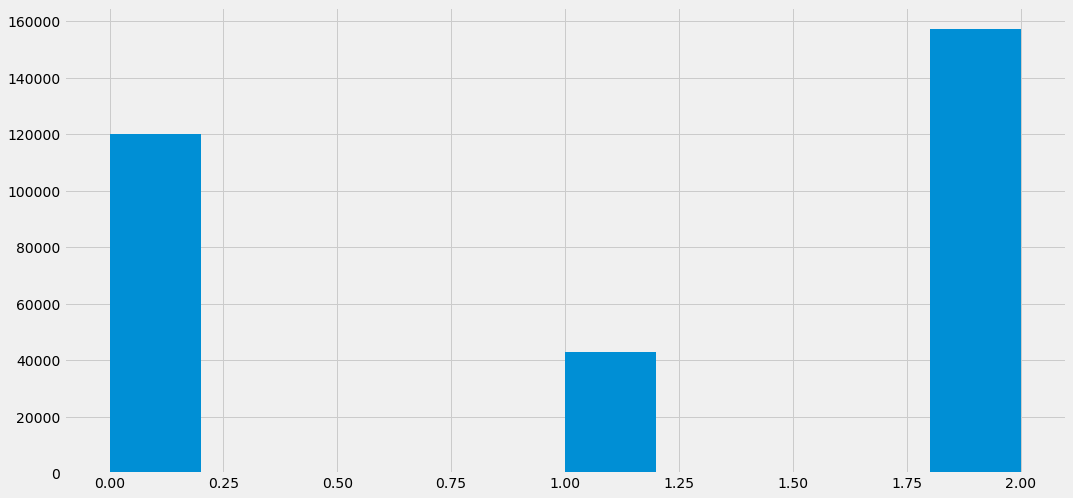

In [12]:
trn['class'].hist() # 종속 변수 분포

In [21]:
trn.loc[trn['nObserve']<trn['nDetect']] #1개의 행을 제외하고는 nObserve가 nDetect보다 큼

,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class
id,,,,,,,,,,,,,,,,,,,
170149,19.9905,18.8374,18.1743,17.7512,17.5601,0.1855,19.946,18.7599,18.122,17.7156,17.5582,20,21,1.2103,1.2116,1.209,1.2096,1.2109,1


In [15]:
trn['i'].quantile(np.arange(0, 1, .01)) #ugriz 값 모두 매우 작은 값 존재 

0.00   -23955.8178
0.01       14.4575
0.02       14.8731
0.03       15.0952
0.04       15.2494
           ...    
0.95       19.6769
0.96       19.8682
0.97       20.0562
0.98       20.2517
0.99       20.6046
Name: i, Length: 100, dtype: float64

In [15]:
trn.loc[trn['g']<0] #0보다 작은 행들은 몇개 없었음


,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class
id,,,,,,,,,,,,,,,,,,,
56421,11.1131,-4.7512,15.5621,13.5894,10.3355,-0.0003,26.0797,24.8327,15.5407,13.5674,24.0527,1,1,1.0479,1.0506,1.0454,1.0466,1.0493,0
173287,19.9833,-17555.3656,17.9093,-17555.3656,-17555.3656,0.0932,19.7719,-9999.0000,17.8146,-9999.0000,-9999.0000,5,4,1.3061,1.3121,1.3002,1.3031,1.3090,1
174943,18.8070,-12.4441,22.5297,24.9915,-3.3308,0.0485,19.9280,25.0598,27.5411,27.7374,22.4782,4,1,1.0282,1.0261,1.0304,1.0292,1.0271,2
274163,-17.6875,-5.9988,13.8877,14.6469,2.1267,0.0018,24.5636,25.0590,13.8524,14.6256,22.8056,2,1,1.1237,1.1193,1.1282,1.1259,1.1215,1


In [17]:
trn_sample = trn.sample(n=10000, random_state=seed) #sample means extracting sampling data 

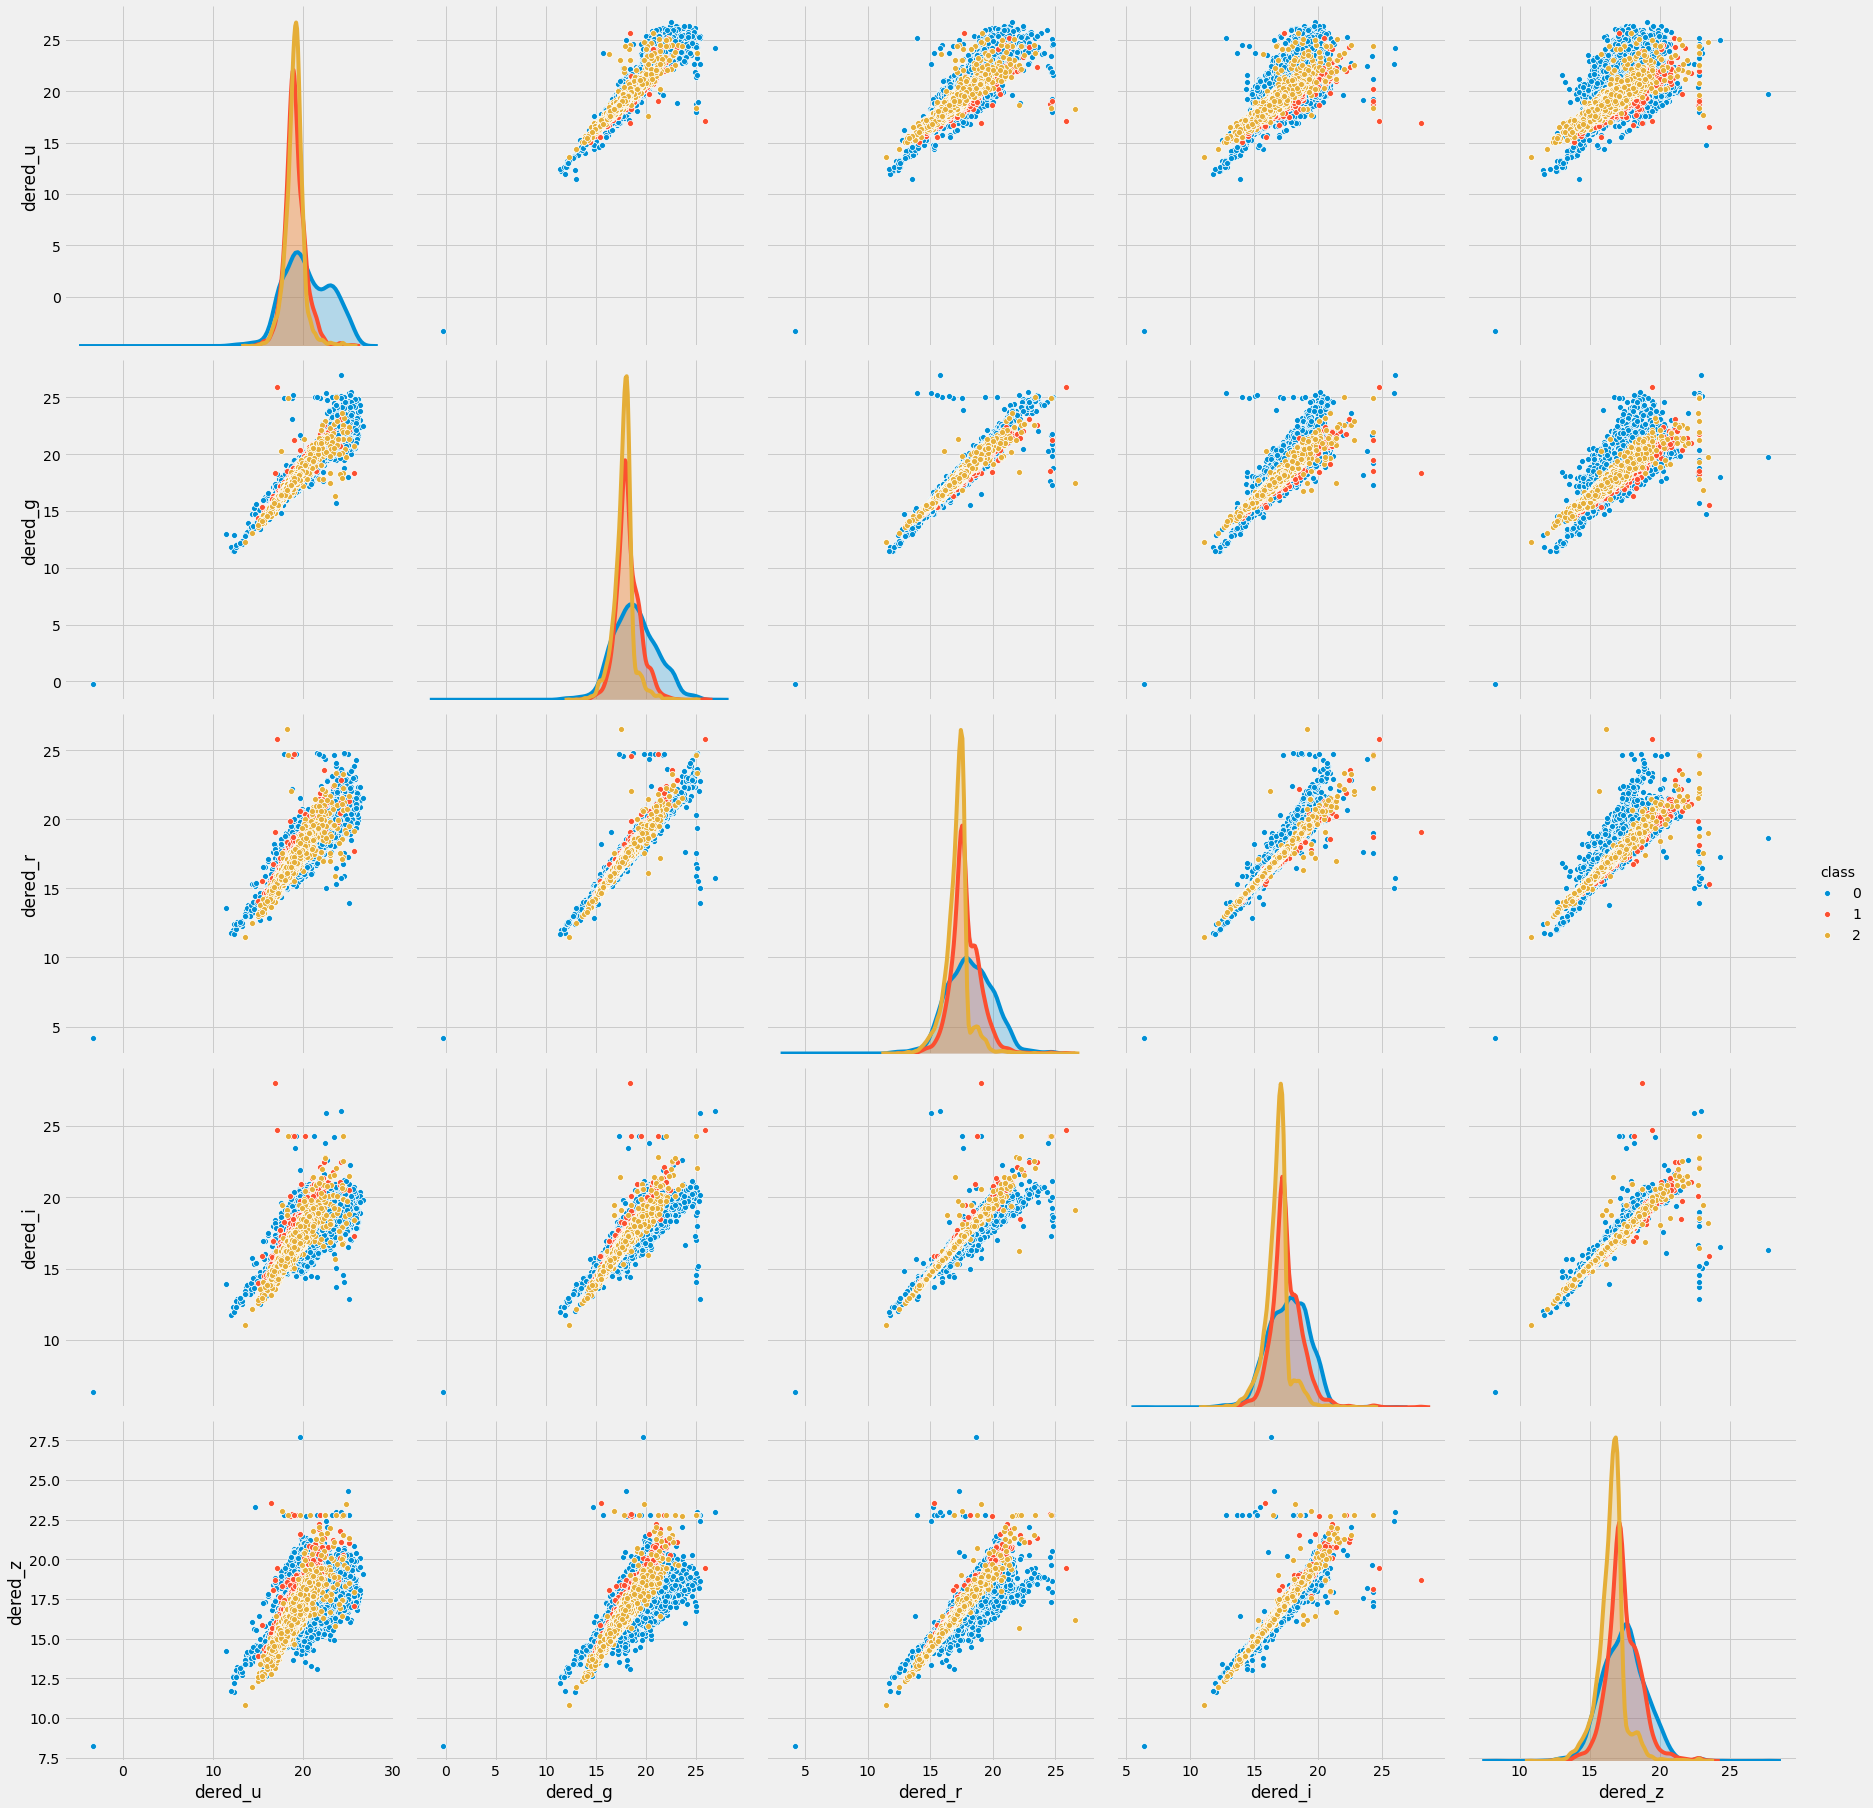

In [18]:
sns.pairplot(data=trn_sample, vars=['dered_u', 'dered_g', 'dered_r', 'dered_i', 'dered_z'], hue='class', size=5) #class 2번을 예측할 때 선형적인 모습을 확인 할수 있음 dered_z-dered_i

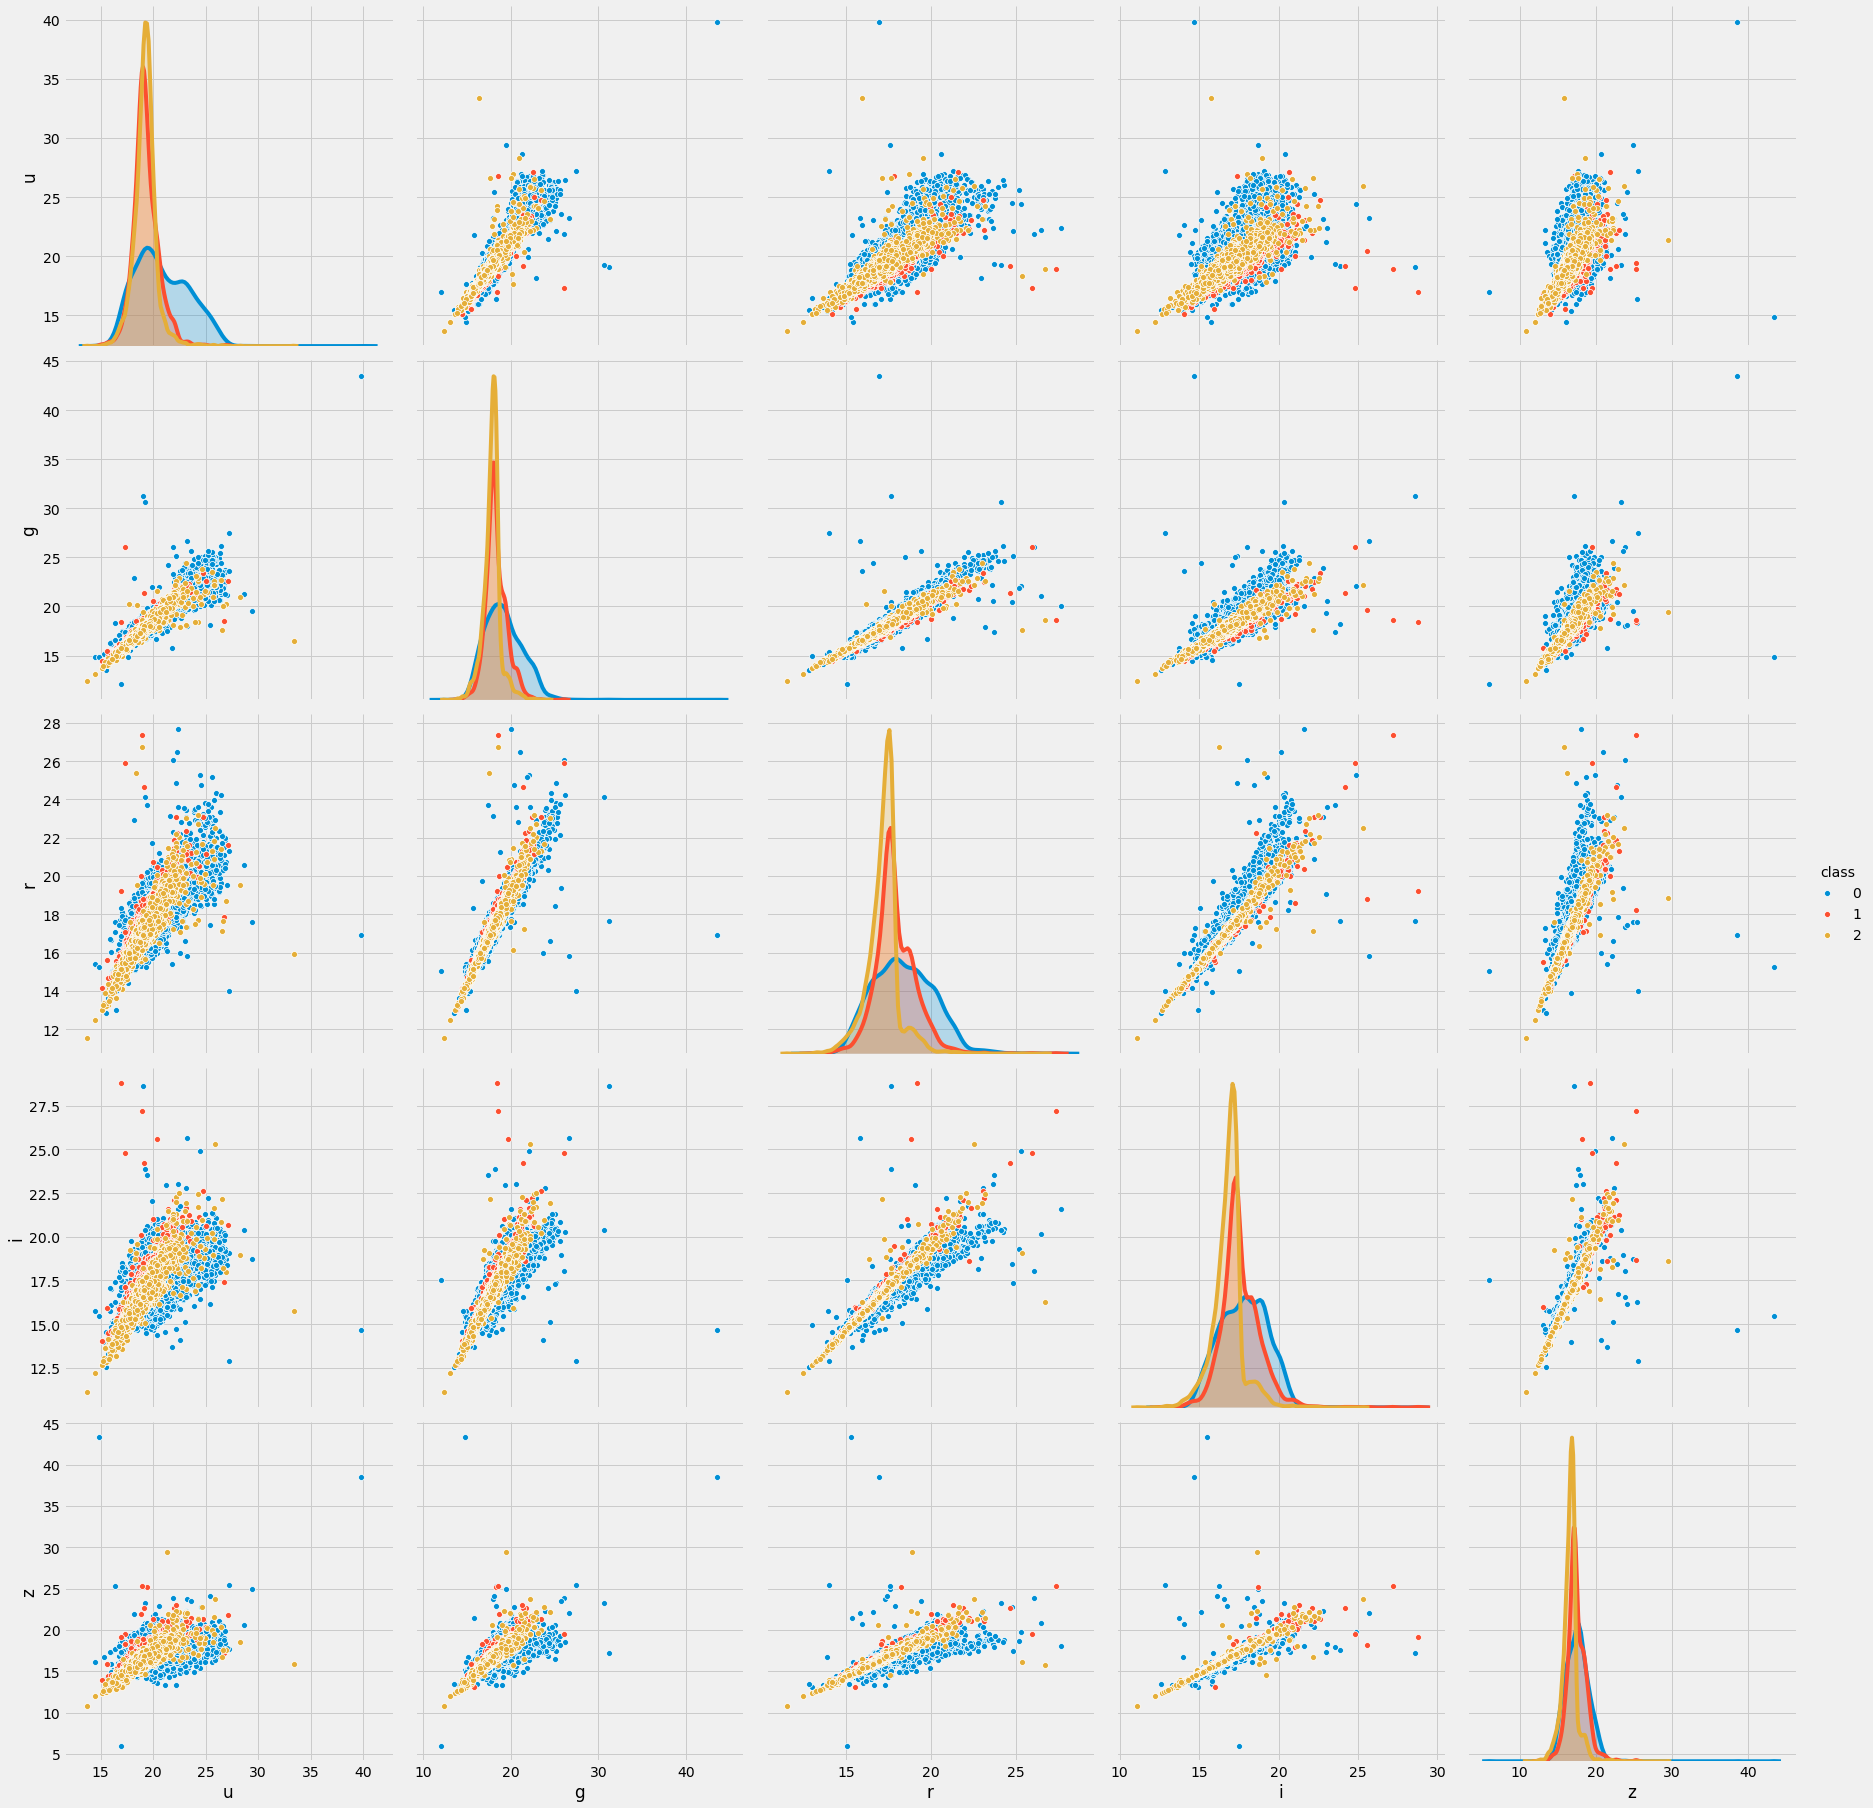

In [19]:
sns.pairplot(data=trn_sample, vars=['u', 'g', 'r', 'i', 'z'], hue='class', size=5) #여기서도 class 2번을 예측할 때 선형적인 모습을 확인 할수 있음 z-i

In [ ]:
sns.pairplot(data=trn_sample, vars=['airmass_u', 'airmass_g', 'airmass_r', 'airmass_i', 'airmass_z'], hue='class', size=5) #airmass_ugriz로는 크게 구분이 안될 것으로 예측됨

In [24]:
tst = pd.read_csv(tst_file, index_col=0)
print(tst.shape)
tst.head()

(80000, 18)


,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z
id,,,,,,,,,,,,,,,,,,
320000,19.1431,18.0172,17.4733,17.1144,16.9263,1.2130e-01,19.0750,17.9550,17.4308,17.0838,16.9087,1,1,1.1563,1.1515,1.1613,1.1588,1.1539
320001,18.7409,17.1705,16.3691,15.9865,15.7307,-6.6907e-05,15.0703,14.3098,14.3901,14.5160,14.6372,2,2,1.0076,1.0074,1.0080,1.0078,1.0075
320002,19.2980,17.8803,17.2221,16.8096,16.6352,1.1001e-01,19.1004,17.7726,17.1460,16.7497,16.5689,1,1,1.3809,1.3905,1.3715,1.3761,1.3856
320003,18.0775,17.1569,16.9041,16.8118,16.7955,2.9697e-05,17.9729,17.0735,16.8470,16.7700,16.7668,1,1,1.1408,1.1408,1.1409,1.1408,1.1408
320004,17.8325,16.7646,16.2135,15.8722,15.6621,6.8471e-02,17.7545,16.6794,16.1563,15.8315,15.6433,2,2,1.1110,1.1077,1.1145,1.1127,1.1093


In [26]:
df = pd.concat([trn, tst], axis=0)
print(df.shape)
df.tail()
#test 데이터 train 데이터 결합

(400000, 19)


,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class
id,,,,,,,,,,,,,,,,,,,
399995,19.6734,18.6617,18.2708,18.1225,18.0627,-0.0003,19.3361,18.3933,18.0860,17.9861,17.9670,17,17,1.1858,1.1863,1.1855,1.1857,1.1861,NaN
399996,21.5229,20.7283,20.6087,21.0049,20.8458,0.0655,21.3993,20.6399,20.5451,20.9507,20.7827,8,4,1.2850,1.2908,1.2793,1.2821,1.2878,NaN
399997,19.3991,18.2411,18.1605,18.1978,18.2018,-0.0008,18.9136,17.8753,17.9047,18.0043,18.0400,1,1,1.1885,1.1886,1.1885,1.1885,1.1885,NaN
399998,18.8997,17.6009,17.1329,16.8223,16.5946,0.0428,18.7715,17.4880,17.0557,16.7660,16.5585,17,17,1.1804,1.1813,1.1797,1.1800,1.1809,NaN
399999,20.7587,20.4252,20.5362,20.7729,20.9698,0.0003,20.4958,20.2181,20.3939,20.6696,20.9085,5,5,1.1832,1.1775,1.1889,1.1860,1.1803,NaN


In [27]:
df.fillna(-1, inplace=True)
df.tail()
#null 처리

,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class
id,,,,,,,,,,,,,,,,,,,
399995,19.6734,18.6617,18.2708,18.1225,18.0627,-0.0003,19.3361,18.3933,18.0860,17.9861,17.9670,17,17,1.1858,1.1863,1.1855,1.1857,1.1861,-1.0
399996,21.5229,20.7283,20.6087,21.0049,20.8458,0.0655,21.3993,20.6399,20.5451,20.9507,20.7827,8,4,1.2850,1.2908,1.2793,1.2821,1.2878,-1.0
399997,19.3991,18.2411,18.1605,18.1978,18.2018,-0.0008,18.9136,17.8753,17.9047,18.0043,18.0400,1,1,1.1885,1.1886,1.1885,1.1885,1.1885,-1.0
399998,18.8997,17.6009,17.1329,16.8223,16.5946,0.0428,18.7715,17.4880,17.0557,16.7660,16.5585,17,17,1.1804,1.1813,1.1797,1.1800,1.1809,-1.0
399999,20.7587,20.4252,20.5362,20.7729,20.9698,0.0003,20.4958,20.2181,20.3939,20.6696,20.9085,5,5,1.1832,1.1775,1.1889,1.1860,1.1803,-1.0


<AxesSubplot:>

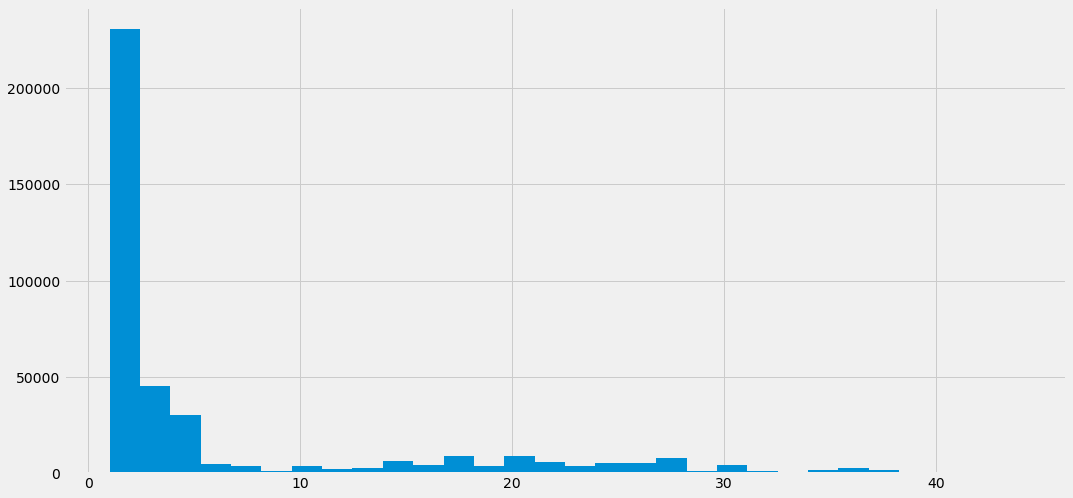

In [28]:
df['nObserve'].hist(bins=30) #멱급수 분포, nDetect도 멱급수 분포이긴 한데 뒤에서 지울거라 굳이 변환 안해줌.


In [44]:

df['nObserve'] = df['nObserve'].apply(np.log1p)

In [45]:
#https://en.wikipedia.org/wiki/Extinction_(astronomy)
#행성에서 조금 더 붉게 보이는 현상을 reddening이라하는데 이것을 보정한 것을 dered라고 가정함.
#그래서 그 차이값이 의미 있을거라 판단함.-> 뭘뺄건지는 실험적인 방법으로 찾음.
df['d_dered_u'] = df['dered_u'] - df['u']
df['d_dered_g'] = df['dered_g'] - df['g']
df['d_dered_r'] = df['dered_r'] - df['r']
df['d_dered_i'] = df['dered_i'] - df['i']
df['d_dered_z'] = df['dered_z'] - df['z']
#https://arxiv.org/pdf/1410.4696.pdf
#dered의 여러 값을 뺀 논문을 참고했더니 아래와 같은 피쳐를 사용했길래 가져옴.
df['d_dered_zi'] = df['dered_z'] - df['dered_i']
df['d_dered_zr'] = df['dered_z'] - df['dered_r']
df['d_dered_zg'] = df['dered_z'] - df['dered_g']
df['d_dered_zu'] = df['dered_z'] - df['dered_u']
df['d_dered_ir'] = df['dered_i'] - df['dered_r']
df['d_dered_ig'] = df['dered_i'] - df['dered_g']
df['d_dered_iu'] = df['dered_i'] - df['dered_u']
df['d_dered_rg'] = df['dered_r'] - df['dered_g']
df['d_dered_ru'] = df['dered_r'] - df['dered_u']
df['d_dered_gu'] = df['dered_g'] - df['dered_u']
#EDA에서 nObserve가 1개행 제외하고 nDetect보다 더 크거나 같음을 확인했고 나누기가 가장의미있을 거라 판단함. ->발견 수/전체 관측 수
df['d_obs_det'] =  df['nDetect'] / df['nObserve']

print(df.shape)
df.head()

In [40]:
df.corr().style.background_gradient() #상관관계를 보고 값이 0.98이상인 것들은 아래 코드에서 제거해줌.

,z,redshift,dered_z,airmass_u,class,d_dered_zr,d_dered_zi,d_dered_ir,d_dered_ug,d_dered_ur,d_dered_rz,d_dered_rg,d_dered_ru,d_dered_gu,d_dered_gr,d_dered_gz,std_div,d_dered_ri_gr,u_g,g_r,r_i,i_z,d_p1,d_l_color,d_s_color,ortho,parall,diff_u,diff_g,diff_z,diff_r,diff_i,d_nob_nde,diff_std,diff_sum,u_asinh,g_asinh,r_asinh,i_asinh,z_asinh
z,1.0000,-0.0002,0.7096,-0.0002,-0.0083,0.7092,0.1904,0.8881,-0.5309,-0.0012,-0.7092,-0.5311,0.0012,0.5309,0.5311,-0.5270,0.0196,-0.8676,-0.5312,0.5313,-0.8987,-0.4376,-0.5290,-0.1515,0.5312,-0.8934,-0.8484,0.0009,0.5309,0.7360,0.0007,0.8904,-0.0054,-0.5515,-0.9730,-0.0093,-0.2295,-0.0139,-0.6069,-0.5899
redshift,-0.0002,1.0000,-0.0001,0.0011,0.0484,0.0000,-0.0001,0.0001,-0.0008,-0.0106,-0.0000,-0.0001,0.0106,0.0008,0.0001,0.0000,-0.0028,-0.0001,-0.0003,-0.0000,-0.0000,0.0001,-0.0014,0.0004,0.0003,-0.0000,-0.0001,-0.0016,-0.0005,-0.0001,-0.0106,-0.0002,0.0064,-0.0002,-0.0002,0.0035,0.0005,0.0022,0.0001,-0.0008
dered_z,0.7096,-0.0001,1.0000,-0.0010,-0.0090,0.9991,0.7740,0.6318,-0.4466,-0.0021,-0.9991,-0.4466,0.0021,0.4466,0.4466,-0.8933,0.0340,-0.6280,-0.4468,0.4468,-0.6246,-0.3363,-0.4450,-0.0105,0.4468,-0.6314,-0.5579,-0.0042,0.4463,0.0452,-0.0043,0.6057,-0.0081,-0.7855,-0.6747,-0.0143,-0.1985,-0.0228,-0.4420,-0.5579
airmass_u,-0.0002,0.0011,-0.0010,1.0000,-0.0483,-0.0046,-0.0035,-0.0029,0.0037,0.0437,0.0046,0.0008,-0.0437,-0.0037,-0.0008,0.0047,0.0848,0.0027,0.0027,-0.0014,0.0026,-0.0000,0.0061,0.0003,-0.0018,0.0026,0.0026,-0.0308,-0.0031,0.0008,-0.0313,-0.0028,-0.2482,0.0039,0.0044,-0.0485,-0.0373,-0.0536,-0.0375,-0.0260
class,-0.0083,0.0484,-0.0090,-0.0483,1.0000,-0.0001,-0.0005,0.0004,-0.0037,-0.0878,0.0001,0.0021,0.0878,0.0037,-0.0021,-0.0009,-0.2139,-0.0001,-0.0024,-0.0019,0.0006,0.0028,-0.0086,-0.0002,-0.0000,0.0008,-0.0001,-0.0791,-0.0040,-0.0031,-0.0793,-0.0026,0.1338,-0.0017,-0.0038,0.1378,0.1057,0.1539,0.1072,0.0747
d_dered_zr,0.7092,0.0000,0.9991,-0.0046,-0.0001,1.0000,0.7745,0.6326,-0.4469,-0.0076,-1.0000,-0.4466,0.0076,0.4469,0.4466,-0.8943,-0.0076,-0.6287,-0.4471,0.4469,-0.6251,-0.3368,-0.4456,-0.0111,0.4469,-0.6319,-0.5585,0.0013,0.4468,0.0455,0.0015,0.6061,-0.0003,-0.7858,-0.6761,0.0059,-0.1807,0.0043,-0.4239,-0.5460
d_dered_zi,0.1904,-0.0001,0.7740,-0.0035,-0.0005,0.7745,1.0000,0.0001,-0.0001,-0.0031,-0.7745,0.0002,0.0031,0.0001,-0.0002,-0.8657,-0.0010,-0.0000,-0.0000,-0.0001,-0.0000,-0.4348,-0.0002,-0.0002,-0.0001,0.0000,-0.0001,0.0011,0.0000,-0.4739,0.0012,-0.0000,-0.0007,-0.4269,-0.1056,0.0015,0.0012,0.0004,-0.0008,-0.3365
d_dered_ir,0.8881,0.0001,0.6318,-0.0029,0.0004,0.6326,0.0001,1.0000,-0.7064,-0.0082,-0.6326,-0.7062,0.0082,0.7064,0.7062,-0.3538,-0.0108,-0.9939,-0.7068,0.7066,-0.9883,-0.0001,-0.7042,-0.0174,0.7066,-0.9989,-0.8828,0.0008,0.7063,0.6520,0.0010,0.9581,0.0004,-0.7196,-0.9395,0.0075,-0.2871,0.0064,-0.6691,-0.4511
d_dered_ug,-0.5309,-0.0008,-0.4466,0.0037,-0.0037,-0.4469,-0.0001,-0.7064,1.0000,0.0403,0.4469,0.9978,-0.0403,-1.0000,-0.9978,0.0005,0.0024,0.7801,0.9997,-0.9984,0.5906,0.0001,0.9985,-0.6942,-0.9990,0.6749,0.2920,-0.0029,-0.9981,-0.3236,-0.0026,-0.4756,-0.0049,0.3571,0.4947,-0.0126,0.4090,-0.0019,0.4736,0.3188
d_dered_ur,-0.0012,-0.0106,-0.0021,0.0437,-0.0878,-0.0076,-0.0031,-0.0082,0.0403,1.0000,0.0076,-0.0263,-1.0000,-0.0403,0.0263,0.0217,0.1329,0.0032,0.0224,0.0146,0.0032,0.0035,0.0957,0.0092,0.0053,0.0010,0.0098,-0.0823,-0.0034,0.0002,-0.0835,0.0001,-0.1295,0.0003,0.0312,-0.3460,-0.1584,-0.0889,0.0050,0.0310


In [49]:
df.drop(['airmass_z', 'airmass_i', 'airmass_r', 'airmass_g', 'u', 'g', 'r', 'i', 'nDetect', 'd_dered_rg'], 
        axis=1, inplace=True)
print(df.shape)
df.head()

(400000, 37)


In [50]:
df.to_csv(feature_file)

In [38]:
df.describe()

,z,redshift,dered_z,airmass_u,class,d_dered_zr,d_dered_zi,d_dered_ir,d_dered_ug,d_dered_ur,d_dered_rz,d_dered_rg,d_dered_ru,d_dered_gu,d_dered_gr,d_dered_gz,std_div,d_dered_ri_gr,u_g,g_r,r_i,i_z,d_p1,d_l_color,d_s_color,ortho,parall,diff_u,diff_g,diff_z,diff_r,diff_i,d_nob_nde,diff_std,diff_sum,u_asinh,g_asinh,r_asinh,i_asinh,z_asinh
count,400000.0000,4.0000e+05,400000.0000,400000.0000,400000.0000,400000.0000,400000.0000,400000.0000,400000.0000,400000.0000,400000.0000,400000.0000,400000.0000,400000.0000,400000.0000,400000.0000,400000.0000,400000.0000,400000.0000,400000.0000,400000.0000,400000.0000,400000.0000,400000.0000,400000.0000,400000.0000,400000.0000,400000.0000,400000.0000,400000.0000,400000.0000,400000.0000,400000.0000,400000.0000,400000.0000,400000.0000,400000.0000,400000.0000,400000.0000,400000.0000
mean,16.9299,5.8663e-02,16.8695,1.1758,0.6931,-0.7467,-0.2960,-0.4508,1.3957,2.0139,0.7467,-0.6182,-2.0139,-1.3957,0.6182,1.3650,11.9544,0.1162,1.4650,0.6523,0.5359,0.2707,0.2466,0.2687,0.0472,0.1958,0.8873,0.2238,0.1545,0.0605,0.1203,0.0352,-4.6557,0.1471,0.8289,1.2689,1.8052,1.9497,1.9873,1.6997
std,52.2879,5.3757e-01,35.4365,0.1163,1.1827,35.4171,27.4294,22.4038,15.8557,1.0552,35.4171,15.8484,1.0552,15.8557,15.8484,31.6886,1.0000,25.3575,27.7990,27.7938,47.0015,22.8905,7.8784,12.6574,12.5794,51.4142,47.5682,0.6995,11.9595,36.8790,0.3700,25.0963,7.6973,18.3038,4.7178,0.8883,1.0541,0.6824,0.8954,1.2535
min,-23955.8178,-1.6605e+02,-9999.0000,1.0001,-1.0000,-10016.8755,-10016.5565,-10016.8280,-14.5549,-26.8203,-17.7428,-15.2991,-16.4937,-10018.7719,-10016.8146,-27.7746,-11.1157,-17.4669,-62.9862,-17573.2749,-33.4730,-6964.0436,-18.6062,-5559.9955,-7953.7823,-34.7902,-43.9187,-42.2511,-7556.3656,-13956.8178,-30.1964,-13956.8178,-38.1933,0.0018,-347.5738,-4.9918,-7.6206,-6.1361,-4.1582,-32.9397
25%,16.2888,3.5184e-05,16.2334,1.0882,0.0000,-0.7149,-0.2965,-0.4268,1.0372,1.4179,0.3074,-0.8122,-2.3608,-1.5538,0.3820,0.6959,11.3923,-0.0837,1.0717,0.4276,0.2425,0.1067,-0.1834,0.0719,-0.0106,-0.0626,0.3840,0.0706,0.0633,0.0208,0.0440,0.0325,-3.2082,0.0279,0.7068,1.0755,1.5825,1.7092,1.7394,1.4554
50%,16.9184,4.7127e-02,16.8701,1.1793,1.0000,-0.5343,-0.2012,-0.3378,1.2325,1.8172,0.5343,-0.5821,-1.8172,-1.2325,0.5821,1.1179,11.8378,0.0094,1.2743,0.6261,0.3604,0.2196,0.0802,0.2179,0.0531,0.0243,0.6563,0.1342,0.1015,0.0406,0.0702,0.0523,-0.9014,0.0453,0.7724,1.3678,1.8713,1.9982,2.0199,1.7251
75%,17.7297,9.4629e-02,17.6560,1.2276,2.0000,-0.3074,-0.0845,-0.2139,1.5538,2.3608,0.7149,-0.3820,-1.4179,-1.0372,0.8122,1.5268,12.4131,0.0569,1.5987,0.8573,0.4503,0.3150,0.4653,0.3409,0.1197,0.0730,0.9219,0.2341,0.1649,0.0700,0.1137,0.0847,-0.3069,0.0796,0.8527,1.5780,2.0866,2.2152,2.2342,1.9434
max,6976.3922,6.2323e+01,30.7813,2.0508,2.0000,17.7428,16.6637,13.5664,10018.7719,16.4937,10016.8755,10016.8146,26.8203,14.5549,15.2991,10017.2590,21.6863,12520.8383,17575.3489,79.9156,23973.7582,9808.7204,4958.8244,5749.6260,11.4980,23973.4966,28768.5343,66.3661,69.3194,16975.3922,46.9576,26.3505,2.7377,7644.5602,2488.5181,232.8056,277.5024,227.7520,271.4862,255.5839


In [ ]:

feature = pd.read_csv(feature_file, index_col=0)
print(feature.shape)
feature.head()